In [195]:
import pandas as pd
import numpy as np

In [196]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [197]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [198]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [199]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [200]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


In [201]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [202]:
df.shape

(5572, 2)

In [203]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [204]:
df['target'] =encoder.fit_transform(df['target'])

In [205]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [206]:
df.duplicated().sum()

np.int64(403)

In [207]:
df =df.drop_duplicates(keep='first')

In [208]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

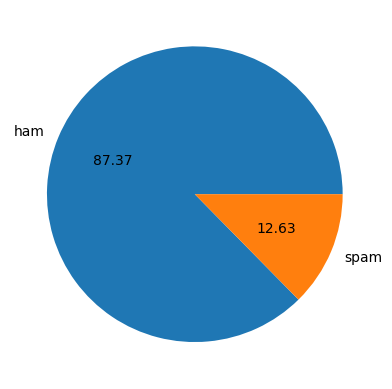

In [209]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [210]:
import nltk

In [211]:
!pip install nltk

In [212]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [213]:
df['num_characters']=df['text'].apply(len)

In [214]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [215]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))


In [216]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [217]:
import re

df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[^.!?]+[.!?]', x)))


In [218]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [219]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846198
std,58.236293,11.068488,1.745556
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [220]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.691984
std,56.358207,11.116240,1.681674
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [221]:
#soam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [222]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

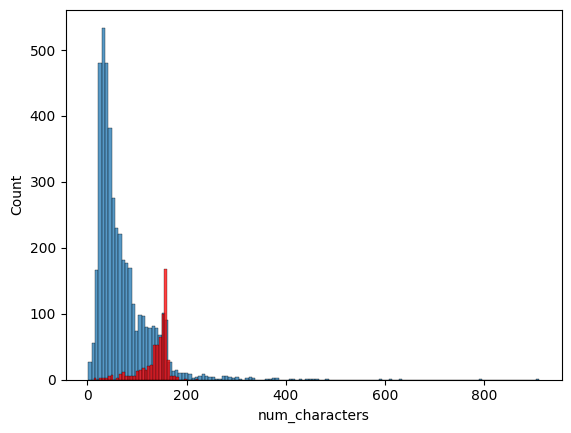

In [223]:
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

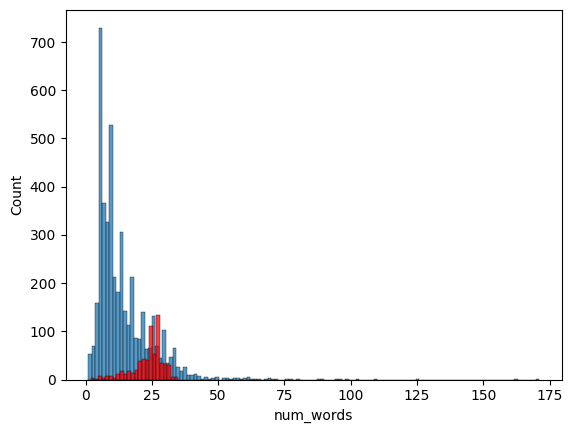

In [224]:
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'],color='red')

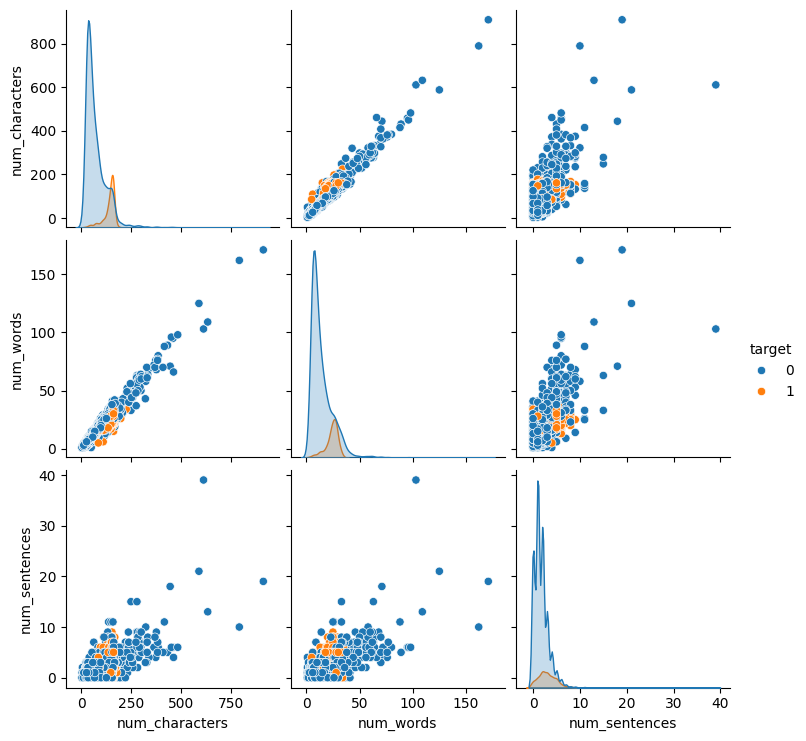

In [225]:
sns.pairplot(df,hue='target')

<Axes: >

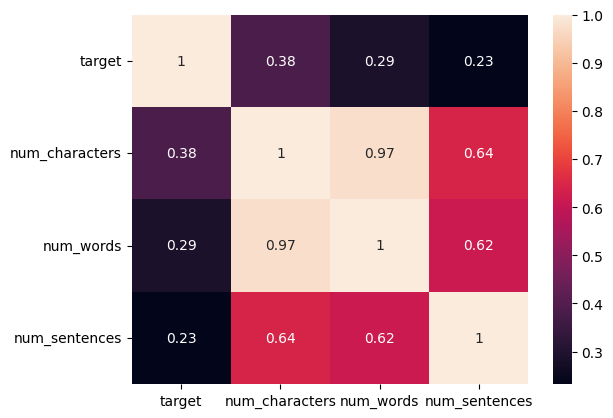

In [226]:
sns.heatmap(df.corr(numeric_only=True),annot =True)


In [227]:
import re
import string

# Custom list of common English stopwords
custom_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she",
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of",
    "at", "by", "for", "with", "about", "against", "between", "into", "through",
    "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then",
    "once", "here", "there", "when", "where", "why", "how", "all", "any", "both",
    "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not",
    "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will",
    "just", "don", "should", "now"
])

# Basic stemming: remove common suffixes
def simple_stem(word):
    for suffix in ["ing", "ly", "ed", "ious", "ies", "ive", "es", "s", "ment"]:
        if word.endswith(suffix) and len(word) > len(suffix) + 2:
            return word[:-len(suffix)]
    return word

def transform_text(text):
    # Lowercase
    text = text.lower()

    # Remove non-alphanumeric characters
    words = re.findall(r'\b\w+\b', text)

    # Remove stopwords
    words = [word for word in words if word not in custom_stopwords]

    # Apply basic stemming
    words = [simple_stem(word) for word in words]

    return " ".join(words)


In [228]:

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'm gonna home soon want talk stuff anymore tonight k ve cri enough today'

In [229]:
def simple_stem(word):
    for suffix in ["ing", "ly", "ed", "ious", "ies", "ive", "es", "s", "ment"]:
        if word.endswith(suffix) and len(word) > len(suffix) + 2:
            return word[:-len(suffix)]
    return word

print(simple_stem("loving"))  # Output: love


lov


In [230]:
df['transformed_text'] = df['text'].apply(transform_text)

In [231]:

df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazy available bugi n great w...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entry 2 wkly comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say ear hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf liv around though


In [232]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [233]:

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

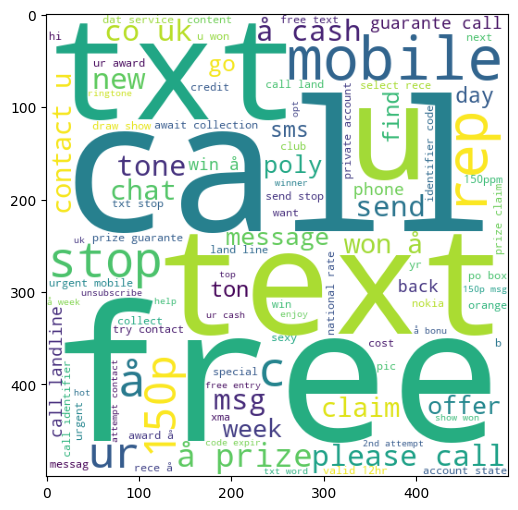

In [234]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [235]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

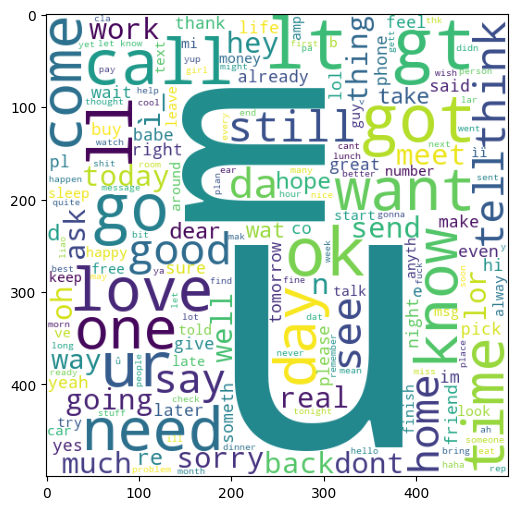

In [236]:

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [237]:

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazy available bugi n great w...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entry 2 wkly comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say ear hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf liv around though


In [238]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [239]:
len(spam_corpus)

12117

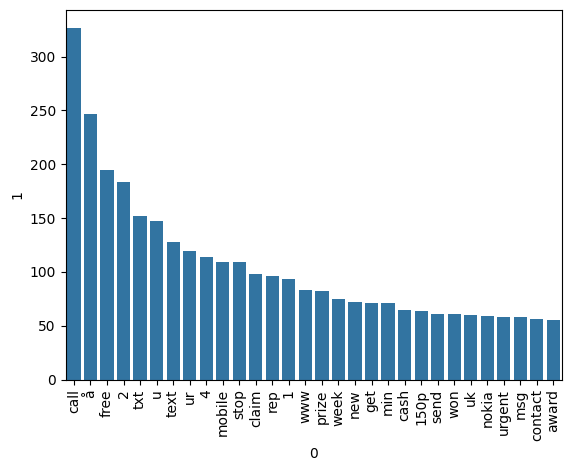

In [240]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Your original logic, minimally fixed:
df_common = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=df_common[0], y=df_common[1])
plt.xticks(rotation='vertical')
plt.show()

In [241]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazy available bugi n great w...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entry 2 wkly comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say ear hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf liv around though


In [242]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [243]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [244]:

X.shape

(5169, 3000)

In [245]:
y = df['target'].values

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [248]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [249]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [250]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [251]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [252]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[895   1]
 [ 12 126]]
0.9921259842519685


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [254]:
! pip install xgboost

In [255]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [256]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [257]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [258]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, np.float64(0.975))

In [259]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9390715667311412
Precision -  0.831858407079646
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9693877551020408
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771


C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667
For  BgC
Accuracy -  0.9526112185686654
Precision -  0.8296296296296296
For  ETC
Accuracy -  0.9835589941972921
Precision -  0.984
For  GBDT
Accuracy -  0.9390715667311412
Precision -  0.8787878787878788
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [260]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [261]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.973888,1.000000
8,ETC,0.983559,0.984000
5,RF,0.972921,0.982456
0,SVC,0.976789,0.975000
4,LR,0.955513,0.969388
10,xgb,0.972921,0.943548
6,AdaBoost,0.969052,0.941667
9,GBDT,0.939072,0.878788
3,DT,0.939072,0.831858


In [262]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [263]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.973888
2,ETC,Accuracy,0.983559
3,RF,Accuracy,0.972921
4,SVC,Accuracy,0.976789
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.972921
7,AdaBoost,Accuracy,0.969052
8,GBDT,Accuracy,0.939072
9,DT,Accuracy,0.939072


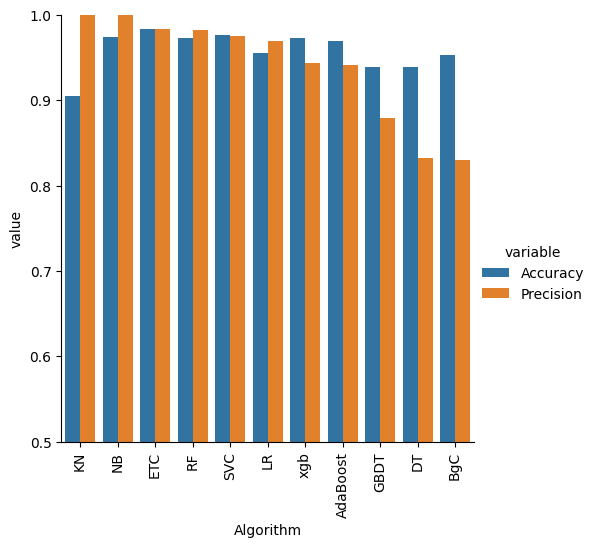

In [264]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [265]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [266]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [267]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [268]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [269]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [270]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
2,ETC,0.983559,0.984000,0.983559,0.984000,0.983559,0.984000,0.983559,0.984000
3,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
5,LR,0.955513,0.969388,0.955513,0.969388,0.955513,0.969388,0.955513,0.969388
6,xgb,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548
7,AdaBoost,0.969052,0.941667,0.969052,0.941667,0.969052,0.941667,0.969052,0.941667
8,GBDT,0.939072,0.878788,0.939072,0.878788,0.939072,0.878788,0.939072,0.878788
9,DT,0.939072,0.831858,0.939072,0.831858,0.939072,0.831858,0.939072,0.831858


In [271]:

# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [272]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [273]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [274]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9825918762088974
Precision 0.9838709677419355


In [275]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [276]:
from sklearn.ensemble import StackingClassifier

In [277]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [278]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9552238805970149


In [282]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))